<a href="https://colab.research.google.com/github/ShinyRyo/NLP/blob/master/airplane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://momonoki2017.blogspot.com/2018/03/python5.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot') # グラフのデザイン変更（お好みで利用）
plt.xkcd() # グラフのデザイン変更（お好みで利用）

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!wget https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv

--2020-10-23 01:30:23--  https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv
Resolving www.analyticsvidhya.com (www.analyticsvidhya.com)... 172.67.69.125, 104.26.14.185, 104.26.15.185, ...
Connecting to www.analyticsvidhya.com (www.analyticsvidhya.com)|172.67.69.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [application/octet-stream]
Saving to: ‘AirPassengers.csv’

AirPassengers.csv   100%[===================>]   1.71K  --.-KB/s    in 0s      

2020-10-23 01:30:23 (26.9 MB/s) - ‘AirPassengers.csv’ saved [1746/1746]



In [ ]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
passengers = pd.Series(df['#Passengers'], dtype='float') # ①
passengers.index = pd.to_datetime(df['Month']) # ②

In [ ]:
print(passengers.index.dtype) # インデックス(日付) -> datetime型
print(len(passengers)) # データ件数 -> 144
passengers.head() # データ値(乗客数) -> float型

datetime64[ns]
144


Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
Name: #Passengers, dtype: float64

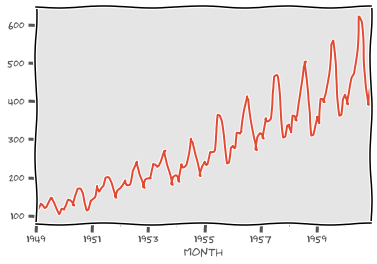

In [ ]:
passengers.plot()

In [ ]:
sm.tsa.seasonal_decompose(passengers)

In [ ]:
res = sm.tsa.seasonal_decompose(passengers)

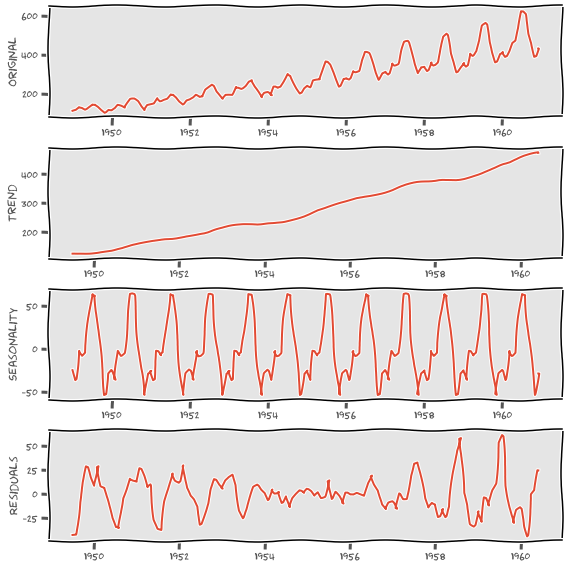

In [ ]:
# res = sm.tsa.seasonal_decompose(passengers) # 解析結果は取得済み

original = passengers # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ

plt.figure(figsize=(8, 8)) # グラフ描画枠作成、サイズ指定

# オリジナルデータのプロット
plt.subplot(411) # グラフ4行1列の1番目の位置（一番上）
plt.plot(original)
plt.ylabel('Original')

# trend データのプロット
plt.subplot(412) # グラフ4行1列の2番目の位置
plt.plot(trend)
plt.ylabel('Trend')

# seasonalデータ のプロット
plt.subplot(413) # グラフ4行1列の3番目の位置
plt.plot(seasonal)
plt.ylabel('Seasonality')

# residual データのプロット
plt.subplot(414) # グラフ4行1列の4番目の位置（一番下）
plt.plot(residual)
plt.ylabel('Residuals')

plt.tight_layout() # グラフの間隔を自動調整

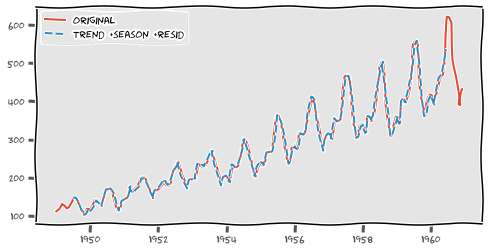

In [ ]:
# res = sm.tsa.seasonal_decompose(passengers) # 解析結果は取得済み

original = passengers # オリジナルデータ
trend = res.trend # トレンドデータ
seasonal = res.seasonal # 季節性データ
residual = res.resid # 残差データ
sum_three_data = trend + seasonal + residual # トレンド + 季節性 + 残差

plt.figure(figsize=(8, 4)) # グラフ描画枠作成、サイズ指定
plt.plot(original, label='original')
plt.plot(sum_three_data, label='trend +season +resid', linestyle='--')
plt.legend(loc='best') # 凡例表示

In [ ]:
passengers.groupby(passengers.index.month).mean()

Month
1     241.750000
2     235.000000
3     270.166667
4     267.083333
5     271.833333
6     311.666667
7     351.333333
8     351.083333
9     302.416667
10    266.583333
11    232.833333
12    261.833333
Name: #Passengers, dtype: float64

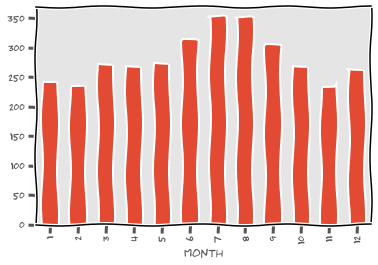

In [ ]:
passengers_month_mean = passengers.groupby(passengers.index.month).mean()
passengers_month_mean.plot(kind='bar')